# HW 8 - Random Numbers

a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.


b) Modify your program to simulate the rolling of two dice a million times (N0) and count the number of times you get double six (N1). Calculate the probability of finding double six in your simulations (N1/N0)


In [193]:
# Ascano, Ronaldo
# due 10.24.18

import numpy as np
from numba import jit
import random
import matplotlib.pyplot as plt

@jit
def dice_roll_prob_simulator(N0):     # where N0 is the number of dice rolls we want to simulate
    
    N1 = 0                            # where N1 is the number of double 6s
    
    for i in range(N0+1):  
        
        np.random.seed(i)
        pair_of_dice_values = np.random.randint(1,7,2)          # generates 2 random numbers between 1-6
        
        if sum(pair_of_dice_values) == 12:
            N1 += 1
        
    P = N1/N0
        
    return P
    
print('The probability of landing double 6s when rolling a pair of dice out of a million times is:',
      dice_roll_prob_simulator(1000000))

The probability of landing double 6s when rolling a pair of dice out of a million times is: 0.027895


----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
c) Write a code to generate random integers within [-5, 5], find the magic series of {a, c, m} [Don't use the built-in function in numpy]

In [79]:
# numpy way

for j in range(50):
    np.random.seed(j)
    a = np.random.randint(-5,6)
    print(a)

0
0
3
5
5
-2
5
-1
-2
0
4
4
1
-3
3
3
4
-4
5
0
-2
4
0
-2
-3
-1
0
-2
-4
0
0
-3
2
-1
-4
4
0
0
-4
4
1
-5
1
-1
-1
-2
0
2
-5
5


[2, 3, 4, -5, 0, -1, -2, -3, 4, -5, 0, -1, 2, 3, -4, -5, 0, 1, 2, 3, -4, -5, 0, -1, -2, -3, -4, 5, 0, -1, -2, -3, 4, -5, 0, 1, -2, -3, -4, 5, 0, -1, 2, -3, 4, 5, 0, 1, -2, -3, -4, -5, 0, 1, 2, 3, -4, 5, 0, -1, 2, 3, 4, 5, 0, -1, -2, -3, 4, -5, 0, -1, 2, -3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, -2, -3, 4, -5, 0, 1, -2, 3, 4, 5, 0, -1, 2, 3, 4, -5, 0, -1, -2, -3, -4, 5, 0, -1, 2, -3, 4, 5, 0, 1, -2, 3, 4, 5, 0, 1, 2, -3, -4, 5, 0, -1, -2, 3, 4, 5, 0, 1, -2, 3, -4, 5, 0, 1, 2, -3, -4, -5, 0, 1, -2, 3, 4, 5, 0, 1, 2]


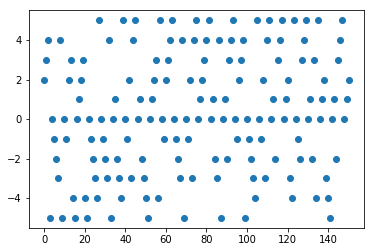

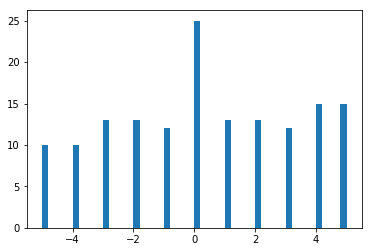

In [219]:
# non-numpy way
# linear congruential random number generator

N = 100
a = 7**100
c = 1
m = 6
x = 13
results = []

for i in range(N+1):      
    x = (a*x+c)%m
    results.append(x)
    results[:] = [random.choice([-1,1])*x for x in results]     #randomly multiplies 1 or -1 to array elements
    
print(results)    
plt.plot(results,"o")
plt.show()

plt.hist(results, bins=50)
plt.show()

In [202]:
# non-numpy way
# using 'random.choice'

array = [-5,-4,-3,-2,-1,0,1,2,3,4,5]

random_array = []


def generate_random_numbers_between_neg5_to_pos5(M):
    
    for i in range(M):
        random_pick = random.choice(array)
        random_array.append(random_pick)
    
    plt.plot(random_array,"o")
    plt.show()

    plt.hist(random_array, bins=50)
    plt.show()
    
    return random_array

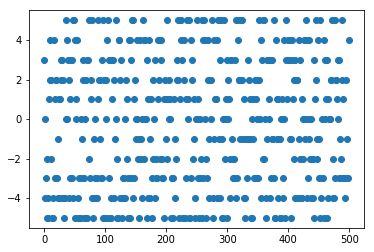

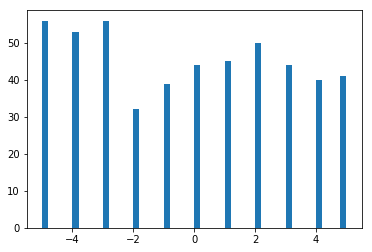

[3, 0, -4, -3, -2, -5, -5, -4, 1, 4, 2, -2, 2, -5, -4, -5, 4, -3, 1, 2, 2, -3, -1, -4, -4, 1, 1, 3, 2, -4, 3, 2, -5, -4, -4, 0, 5, 4, 0, 3, 2, -4, -3, 1, 3, 3, -3, -4, 5, 5, 4, -5, 0, 1, 4, -4, -5, -3, -5, -5, -3, 0, -1, 2, 3, -5, -3, 0, -5, 2, 3, -5, 3, 5, -2, -3, 2, 1, -4, 5, -5, -1, -4, 0, -3, -4, -3, -4, 1, 5, 2, -1, 2, -3, 3, -3, 5, -5, 2, 2, -5, 0, 2, 4, 5, -5, -3, 3, 3, -5, -4, 3, 1, 3, 2, -4, -1, 0, 5, -5, -2, -5, 4, 4, -4, 2, 3, -5, -4, -4, -3, -3, -4, 0, 2, -2, 1, -5, -3, 4, 4, -5, 3, -3, 5, 5, -4, 1, -3, 2, -1, 0, 4, 0, -2, -1, -5, 4, -1, -2, 0, -4, 5, -2, 4, 4, 0, 0, 3, -5, 1, -4, 4, -1, -4, 1, -5, -3, -2, 2, 0, 3, -4, -3, -2, -3, 1, 4, 2, 4, -2, 4, 3, -2, -3, -3, -5, 1, 2, -1, 1, 5, -2, 1, 0, 2, 1, 0, -5, -3, -3, -5, -3, 1, -1, -4, -2, 2, 3, 2, 5, -5, 5, 1, 4, 5, 3, -5, -5, 2, 4, -5, 1, -3, 5, 1, 0, 5, -5, -5, 4, -3, 2, 3, -2, 1, -1, -5, -4, 0, 5, 0, 1, -3, -5, 0, -3, -2, 5, -5, -3, 4, 5, 4, 0, -2, -5, -3, 2, 4, -4, -1, 2, 2, 0, 5, -4, -5, -1, 4, 1, 1, 1, 4, -4, 5, -1, 5, 

In [222]:
print(generate_random_numbers_between_neg5_to_pos5(100))